In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def densityMain(x):
    return 1.0*np.ones_like(x)

def densityBeam(x):
    L = 20.
    u = x/L-0.5
    return np.exp(-u**2)

masses = (2, 3)

In [3]:
def mass_1(x, **kwargs):
    masses = kwargs["masses"]       # list of float : the ion pop masses
    densities = kwargs["densities"] # list of callable : the ion pop density profiles

    assert len(masses) == len(densities)

    funcs = [lambda x: masses[0]*densities[0](x), lambda x: masses[1]*densities[1](x)]

    return sum(f(x) for f in funcs)

In [4]:
def mass_2(x, **kwargs):
    masses = kwargs["masses"]       # list of float : the ion pop masses
    densities = kwargs["densities"] # list of callable : the ion pop density profiles

    assert len(masses) == len(densities)

    funcs = []
    for mass, density in zip(masses, densities):
        funcs.append(lambda x: mass*density(x))

    return sum(f(x) for f in funcs)

In [5]:
def mass_3(x, **kwargs):
    masses = kwargs["masses"]       # list of float : the ion pop masses
    densities = kwargs["densities"] # list of callable : the ion pop density profiles

    assert len(masses) == len(densities)

    funcs  = np.zeros((x.size, len(masses)))

    # i=0
    # for mass, density in zip(masses, densities):
    #     funcs[:,i] = mass*density(x)
    #     i+=1

    for i, (mass, density) in enumerate(zip(masses, densities)):
        funcs[:,i] = mass*density(x)
    
    return funcs.sum(axis=1)

In [6]:
x = np.linspace(0, 20, 100)

In [7]:
m1 = mass_1(x, masses=masses, densities=(densityMain, densityBeam))
m2 = mass_2(x, masses=masses, densities=(densityMain, densityBeam))
m3 = mass_3(x, masses=masses, densities=(densityMain, densityBeam))

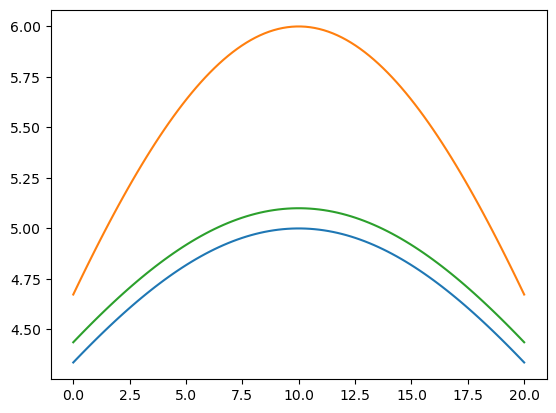

In [8]:
plt.plot(x, m1, x, m2, x, m3+0.1)